<a href="https://www.kaggle.com/code/officialaditshrm/fds-credit-card-fraud-detection-project?scriptVersionId=267130969" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


**Foundations of Data Science - Course Project**

**Professor: Antony Seba P**
# Credit Card Fraud Detection
### Group Members
* Aditya Sharma - 22BDS0009
* Harshvardhan Vatsa - 22BDS0318
* Ayushmaan Mishra - 22BDS0367

Notebook URL: [Kaggle-Notebook](https://www.kaggle.com/code/officialaditshrm/credit-card-fraud-detection-project)

Dataset Link: [Fraud-Detection](http://www.kaggle.com/datasets/kartik2112/fraud-detection)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_columns", None)


warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


## Importing Dataset

In [2]:
df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

df = df.drop(["Unnamed: 0", "cc_num", "merchant", "first", "last", "trans_num"], axis = 1)
df['unix_time'] = pd.to_datetime(df['unix_time'], unit = 's')
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,2012-01-01 00:00:18,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,2012-01-01 00:00:44,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,2012-01-01 00:00:51,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,2012-01-01 00:01:16,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,2012-01-01 00:03:06,38.674999,-78.632459,0


Checking whether there is any difference between unix_time and trans_date_trans_time.

In [3]:
print(f"{df['unix_time']} vs {df['trans_date_trans_time']}")
df['unix_time'].equals(df['trans_date_trans_time'])

0         2012-01-01 00:00:18
1         2012-01-01 00:00:44
2         2012-01-01 00:00:51
3         2012-01-01 00:01:16
4         2012-01-01 00:03:06
                  ...        
1296670   2013-06-21 12:12:08
1296671   2013-06-21 12:12:19
1296672   2013-06-21 12:12:32
1296673   2013-06-21 12:13:36
1296674   2013-06-21 12:13:37
Name: unix_time, Length: 1296675, dtype: datetime64[ns] vs 0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1296670    2020-06-21 12:12:08
1296671    2020-06-21 12:12:19
1296672    2020-06-21 12:12:32
1296673    2020-06-21 12:13:36
1296674    2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: object


False

It seems to be that the unix_time shows the exact same time but 7 years prior to the trans_date_trans_time. So, we shall just drop this column.

In [4]:
df = df.drop("unix_time", axis = 1)
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


## Data Preprocessing

In [5]:
print(f"There are: {df.isnull().sum().sum()} null values.")

There are: 0 null values.


No null values exist

## Exploratory Data Analysis

Since our dataset doesn't contain any issues with null values, we can move straight to understanding how the data looks like inside. We need to understand the different kinds of attributes with univariate, bivariate and multivariate analysis to understand the nature of the dataset and find possible combinations.

### Univariate Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  object 
 4   street                 1296675 non-null  object 
 5   city                   1296675 non-null  object 
 6   state                  1296675 non-null  object 
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  object 
 12  dob                    1296675 non-null  object 
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

### Converting trans_date_trans_time to datetime datatype:

In [7]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.head(5)

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   street                 1296675 non-null  object        
 5   city                   1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   zip                    1296675 non-null  int64         
 8   lat                    1296675 non-null  float64       
 9   long                   1296675 non-null  float64       
 10  city_pop               1296675 non-null  int64         
 11  job                    1296675 non-null  object        
 12  dob                    12966

In [9]:
df.describe()

,trans_date_trans_time,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,2019-10-03 12:47:28.070214144,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03
min,2019-01-01 00:00:18,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2019-06-03 19:12:22.500000,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00
50%,2019-10-03 07:35:47,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00
75%,2020-01-28 15:02:55.500000,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00
max,2020-06-21 12:13:37,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00
std,NaN,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02


It looks like Column **Unnamed: 0** is nothing but the serial number

### Numerical Columns

Following are the numerical Columns: Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')


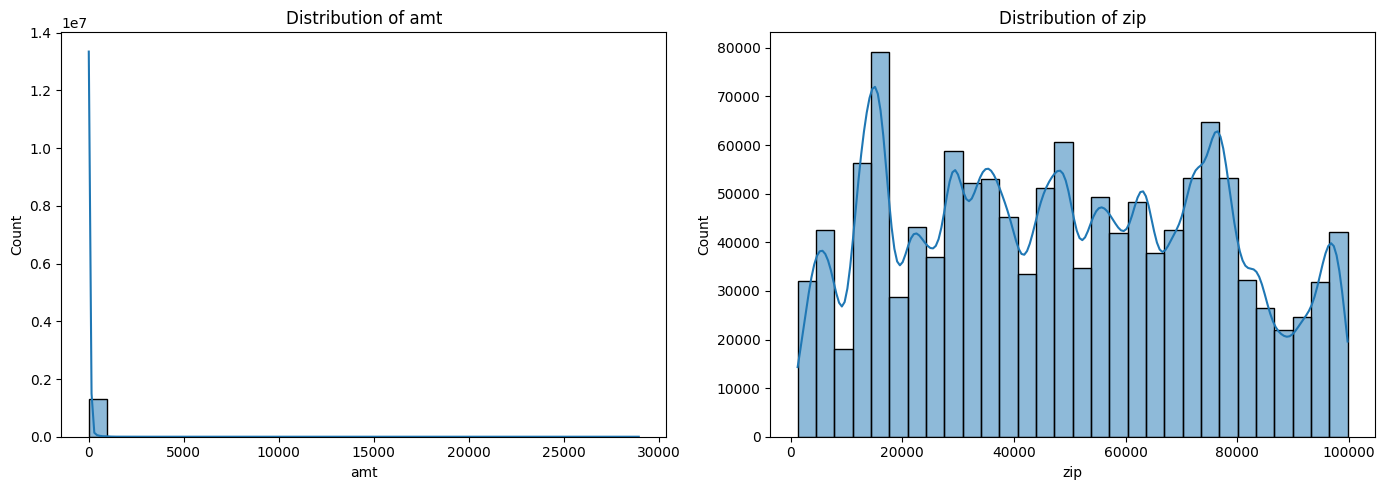

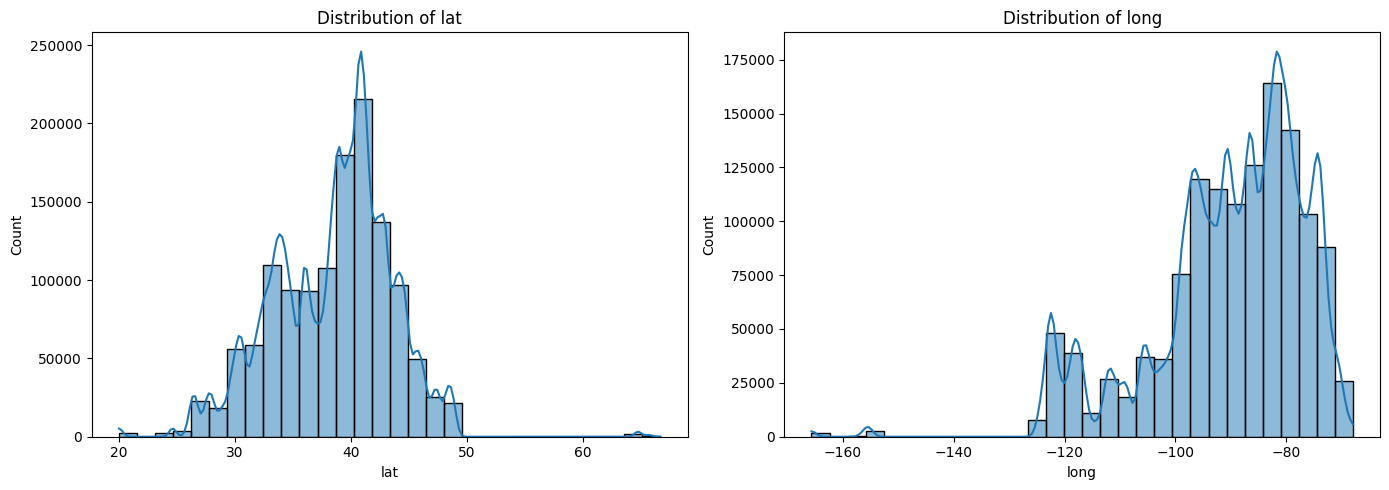

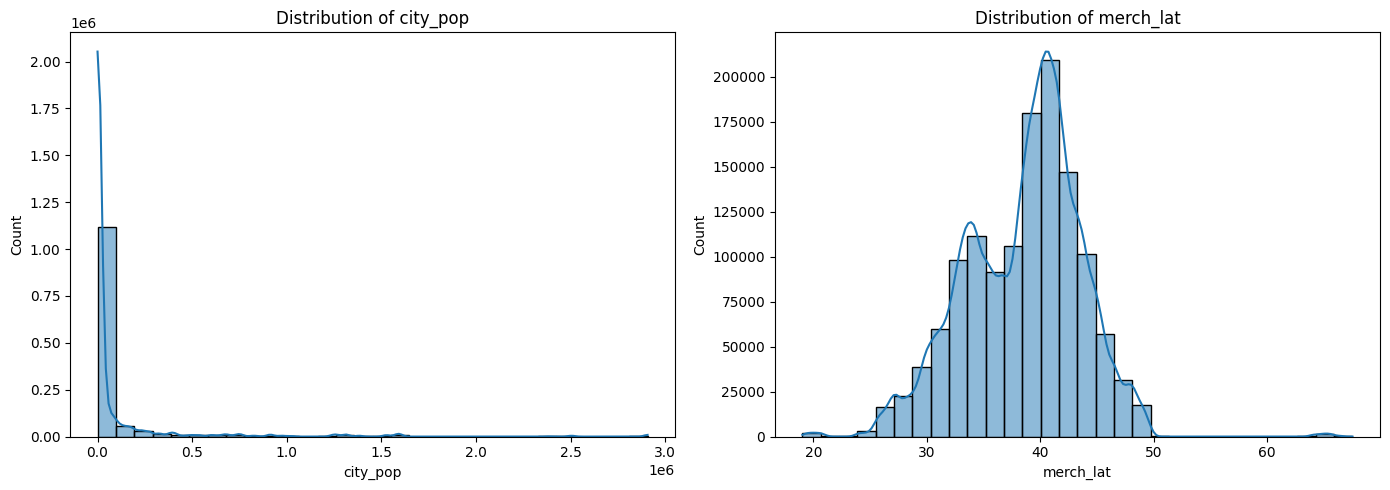

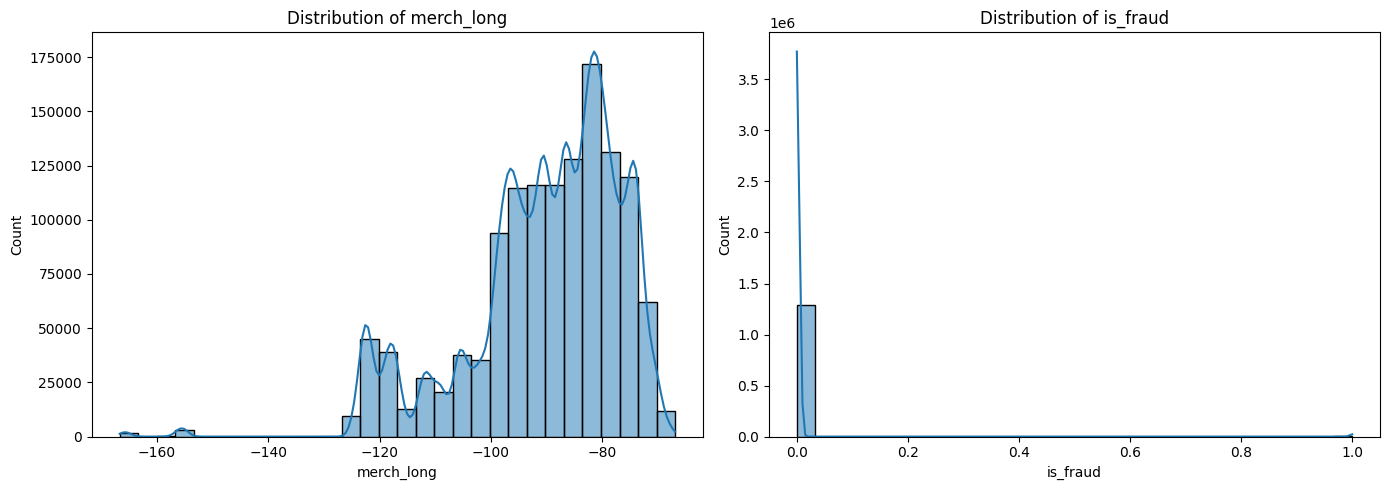

In [10]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

print(f"Following are the numerical Columns: {num_cols}")

# Loop through numerical columns in steps of 2
for i in range(0, len(num_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns
    
    for j in range(2):
        if i + j < len(num_cols):  # safeguard in case odd number of columns
            col = num_cols[i + j]
            
            # Histogram with KDE
            sns.histplot(df[col], kde=True, bins=30, ax=axes[j])
            axes[j].set_title(f"Distribution of {col}")
    
    plt.tight_layout()
    plt.show()


### Categorical Columns

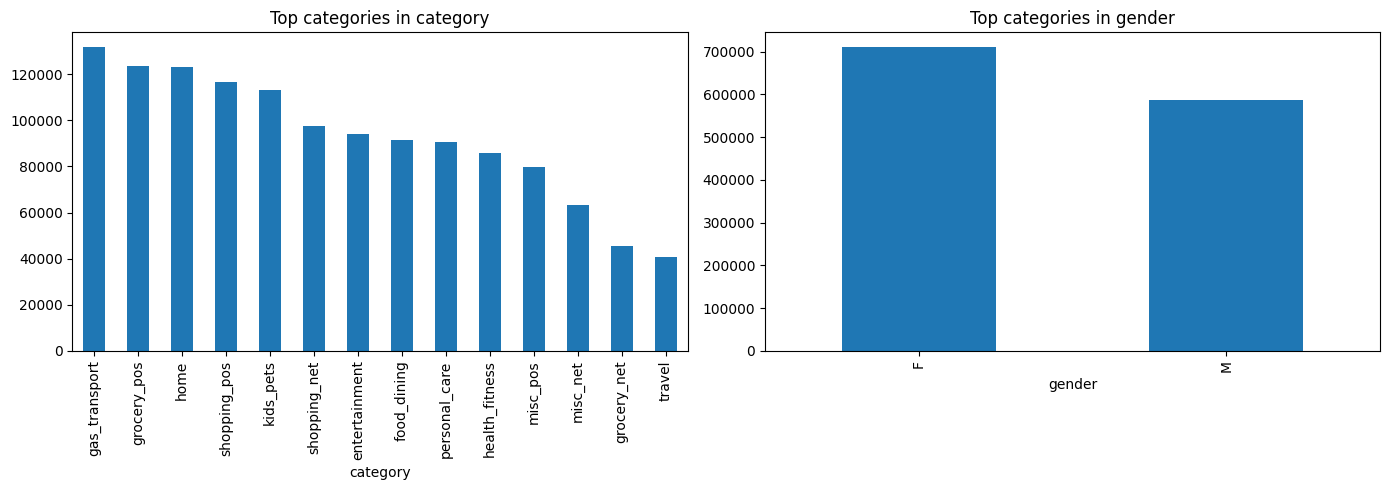

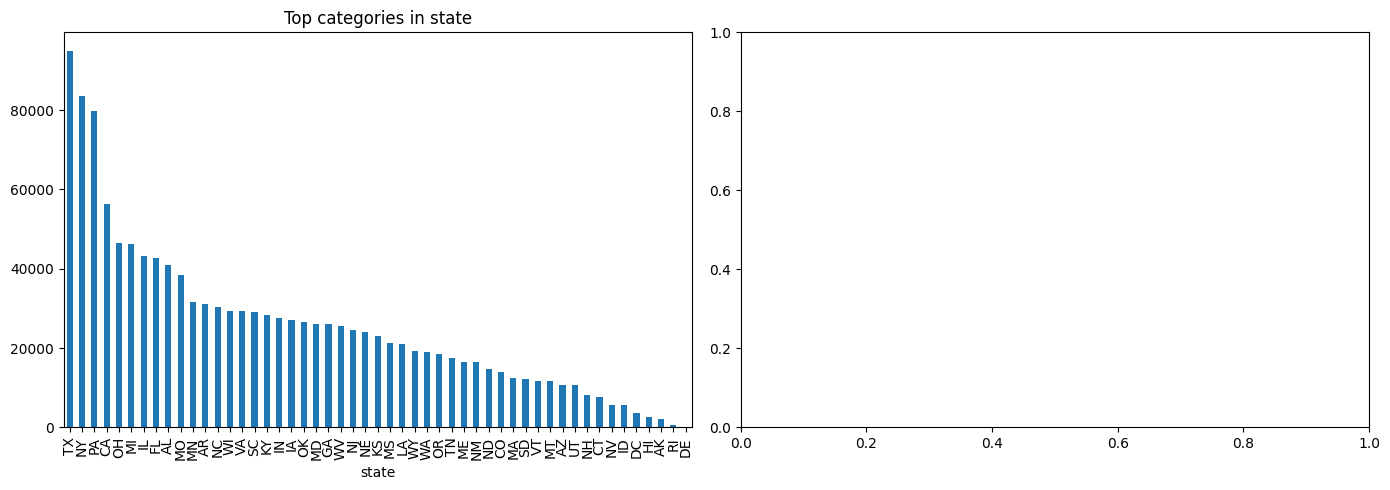

['street', 'city', 'job', 'dob']


In [11]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols2 = [i for i in cat_cols if df[i].nunique() <= 100]
non_numeric_non_cat_cols = [i for i in cat_cols if df[i].nunique() > 100]

# Loop through categorical columns in steps of 2
for i in range(0, len(cat_cols2), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns
    
    for j in range(2):
        if i + j < len(cat_cols2):  # avoid index error if odd number of columns
            col = cat_cols2[i + j]
            df[col].value_counts().plot(kind='bar', ax=axes[j])
            axes[j].set_title(f"Top categories in {col}")
    
    plt.tight_layout()
    plt.show()
print(non_numeric_non_cat_cols)

### Fraud Column (Result Column)

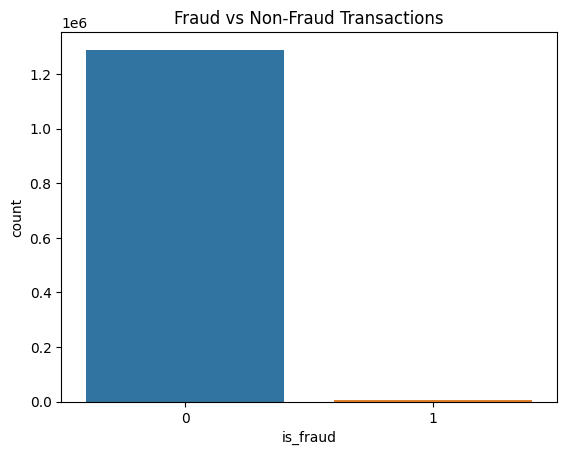

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64


In [12]:
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

print(df['is_fraud'].value_counts(normalize=True))

## We can clearly see that the data is highly imbalanced. We will solve this problem further in this notebook using SMOTE Analysis

### Outlier Detection Boxplots

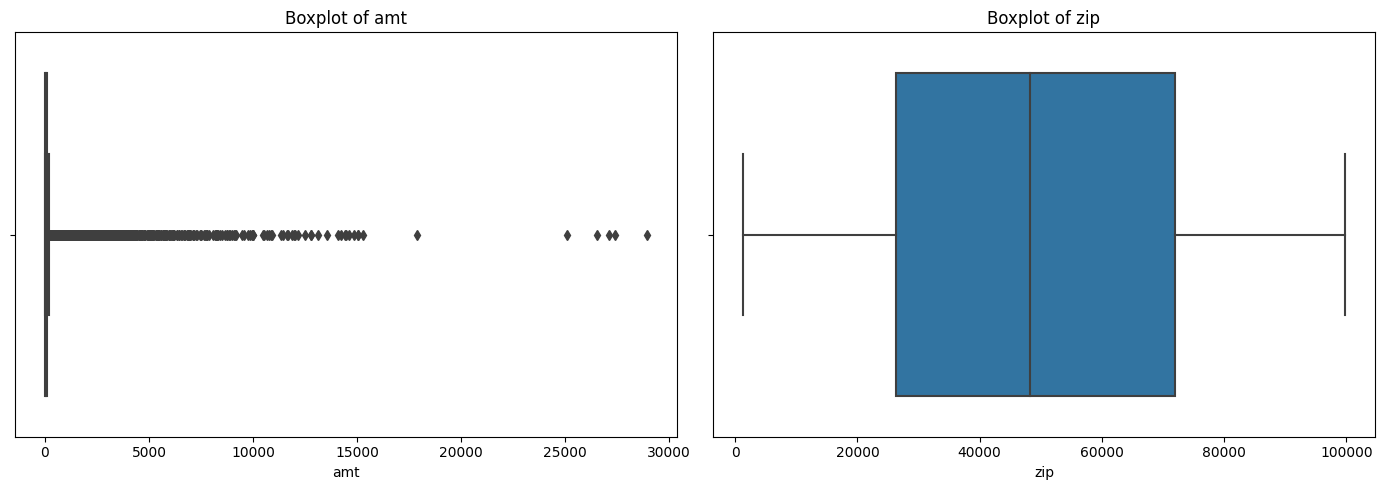

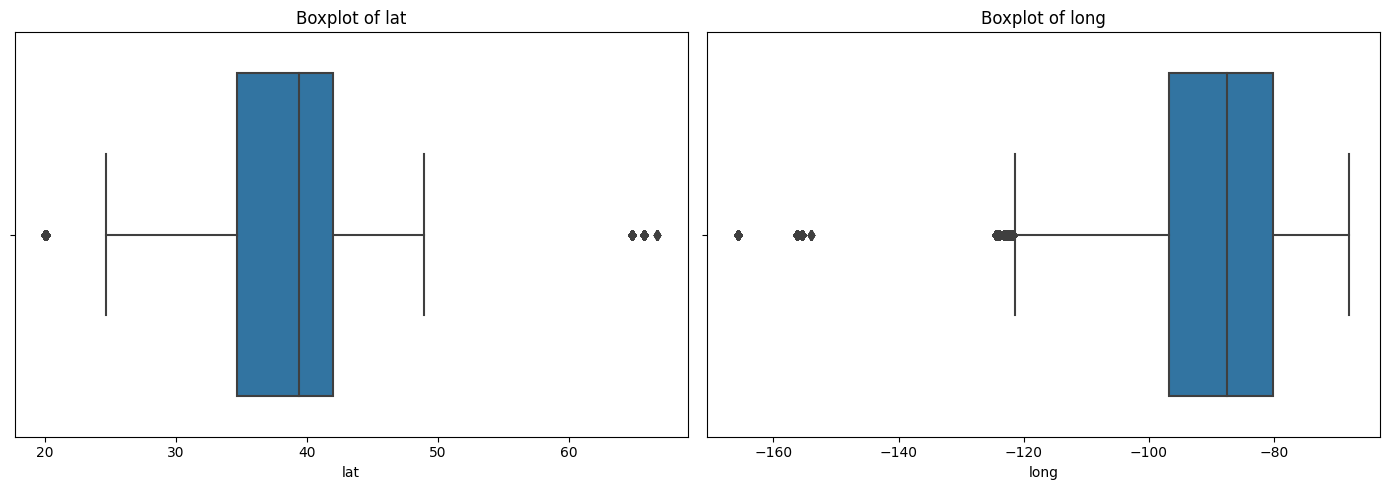

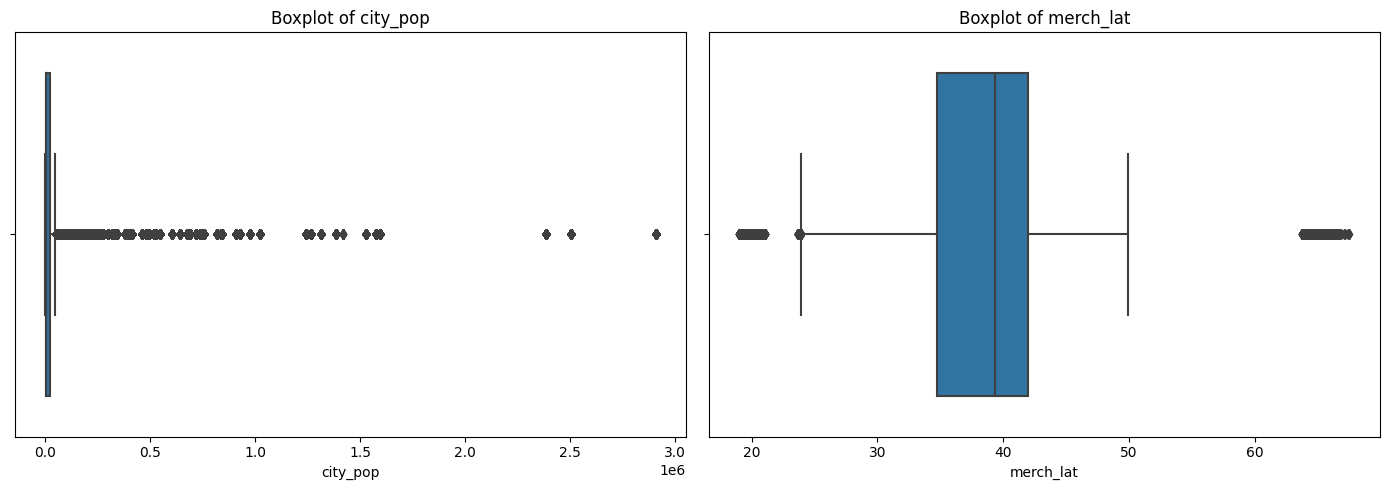

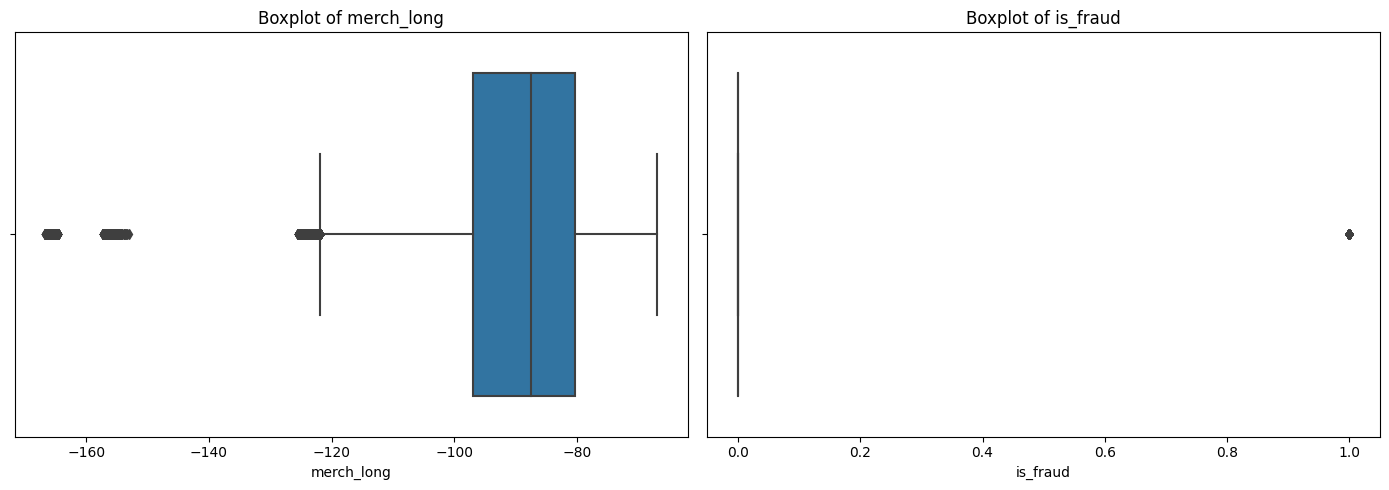

In [13]:
for i in range(0, len(num_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns
    
    for j in range(2):
        if i + j < len(num_cols) and axes[j]:  # safeguard for odd count
            col = num_cols[i + j]
            sns.boxplot(x=df[col], ax=axes[j])
            axes[j].set_title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()


### New columns for proper date and time

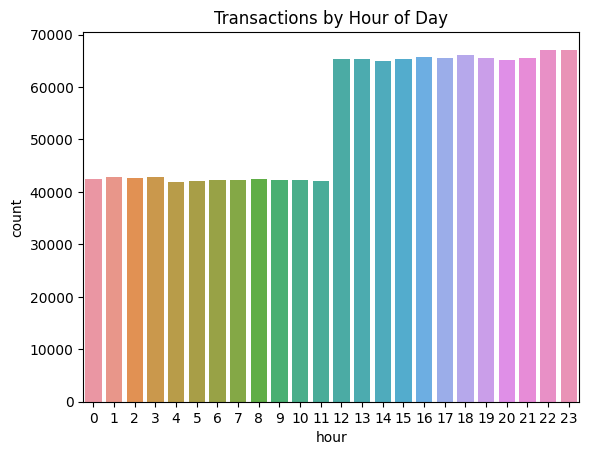

In [14]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['dayofweek'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year

sns.countplot(x="hour", data=df)
plt.title("Transactions by Hour of Day")
plt.show()

In [15]:
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,Tuesday,1,2019
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,Tuesday,1,2019
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,0,Tuesday,1,2019
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,0,Tuesday,1,2019
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,0,Tuesday,1,2019


## Bivariate Analysis

### Correlation Heatmap

### Numerical vs Numerical (Scatter Plot)

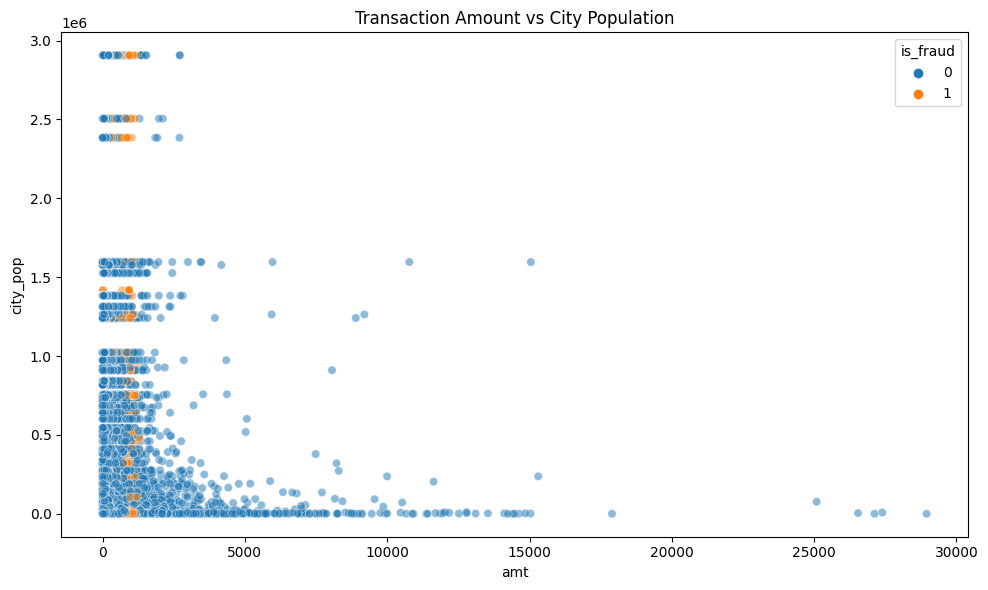

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="amt", y="city_pop", hue="is_fraud", data=df, alpha=0.5)
plt.title("Transaction Amount vs City Population")
plt.tight_layout()
plt.show()

### Numerical vs Categorical

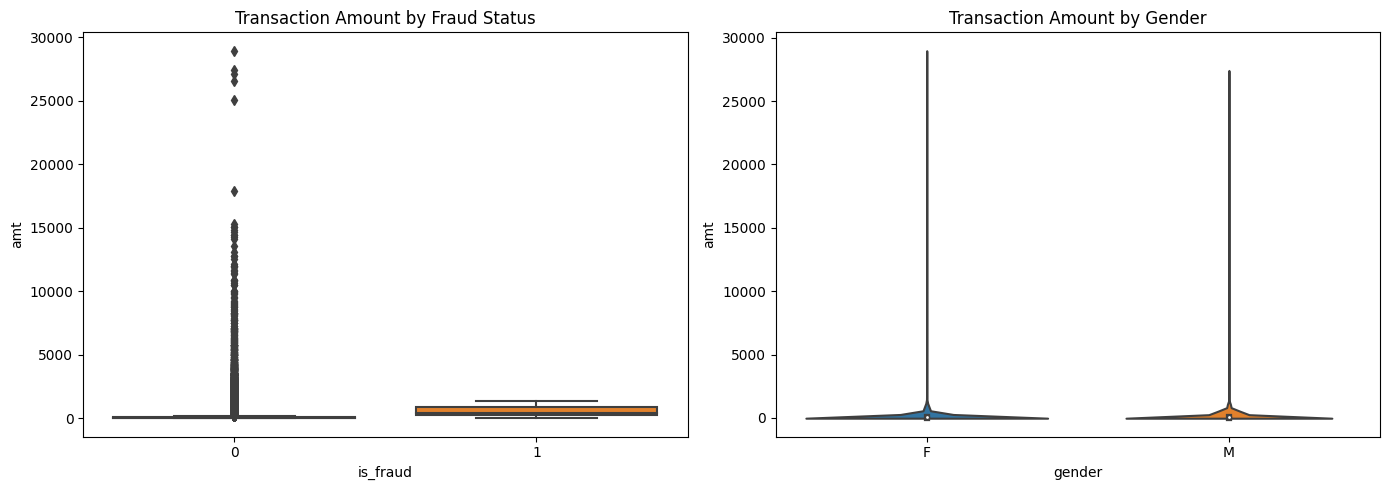

[<Axes: title={'center': 'Transaction Amount by Fraud Status'}, xlabel='is_fraud', ylabel='amt'>
 <Axes: title={'center': 'Transaction Amount by Gender'}, xlabel='gender', ylabel='amt'>]


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(x="is_fraud", y="amt", data=df, ax=axes[0])
axes[0].set_title("Transaction Amount by Fraud Status")

sns.violinplot(x="gender", y="amt", data=df, ax=axes[1])
axes[1].set_title("Transaction Amount by Gender")

plt.tight_layout()
plt.show()
print(axes)

### Categorical vs Categorical

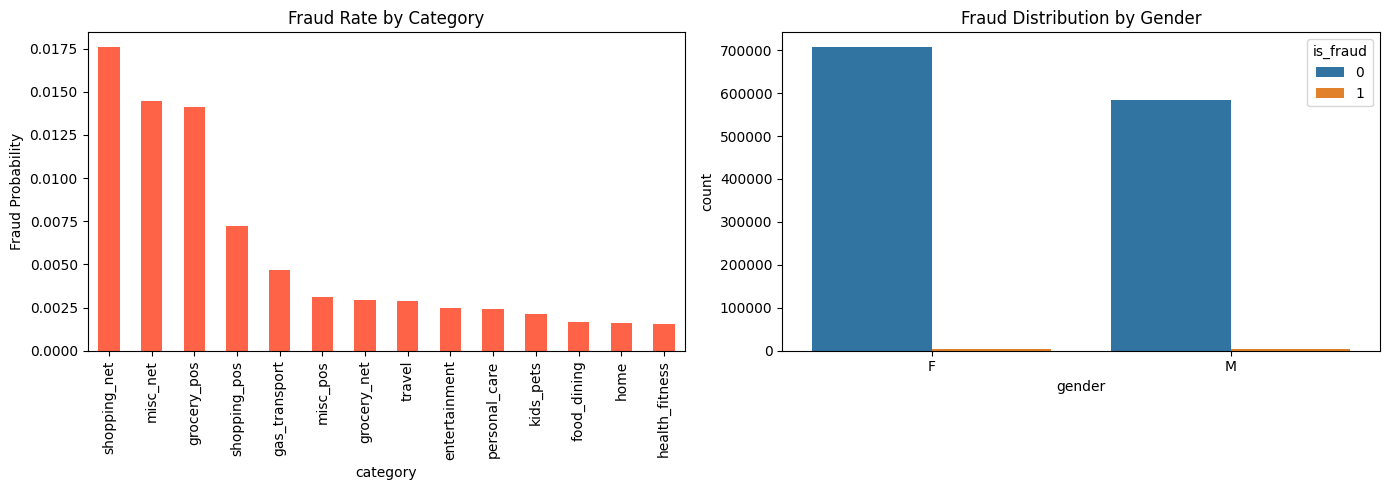

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

fraud_rate = df.groupby("category")["is_fraud"].mean().sort_values(ascending=False)
fraud_rate.plot(kind="bar", color="tomato", ax=axes[0])
axes[0].set_title("Fraud Rate by Category")
axes[0].set_ylabel("Fraud Probability")

sns.countplot(x="gender", hue="is_fraud", data=df, ax=axes[1])
axes[1].set_title("Fraud Distribution by Gender")

plt.tight_layout()
plt.show()

### Time Based Fraud Analysis

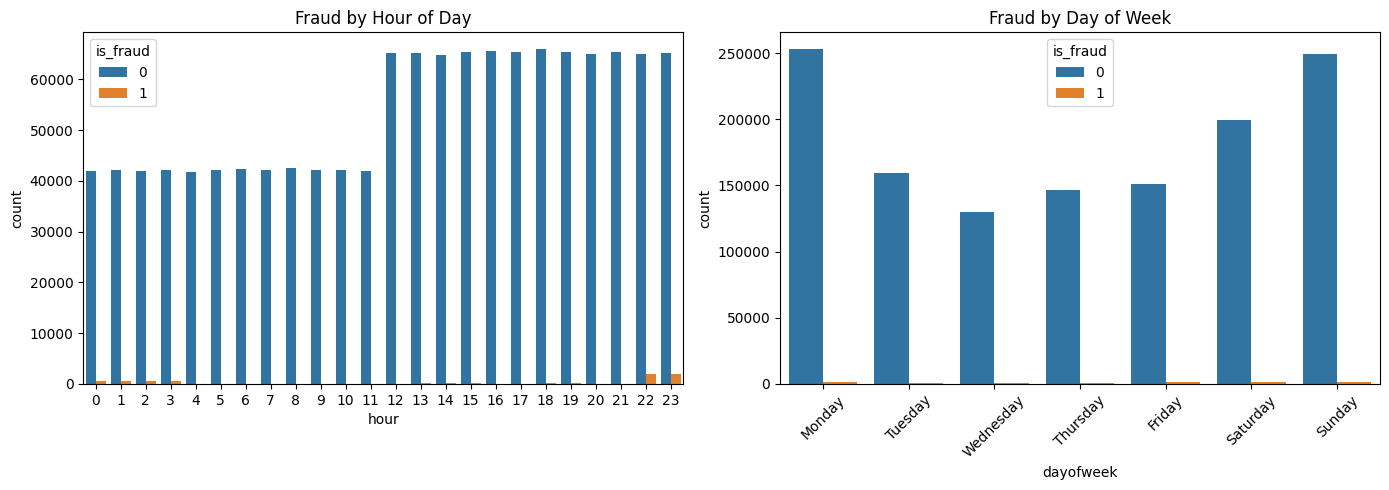

In [19]:
df["hour"] = df["trans_date_trans_time"].dt.hour
df["dayofweek"] = df["trans_date_trans_time"].dt.day_name()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.countplot(x="hour", hue="is_fraud", data=df, ax=axes[0])
axes[0].set_title("Fraud by Hour of Day")

sns.countplot(x="dayofweek", hue="is_fraud", 
              data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], ax=axes[1])
axes[1].set_title("Fraud by Day of Week")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## Multivariate Analysis

### A quick overview of how numerical features interact, colored by fraud.

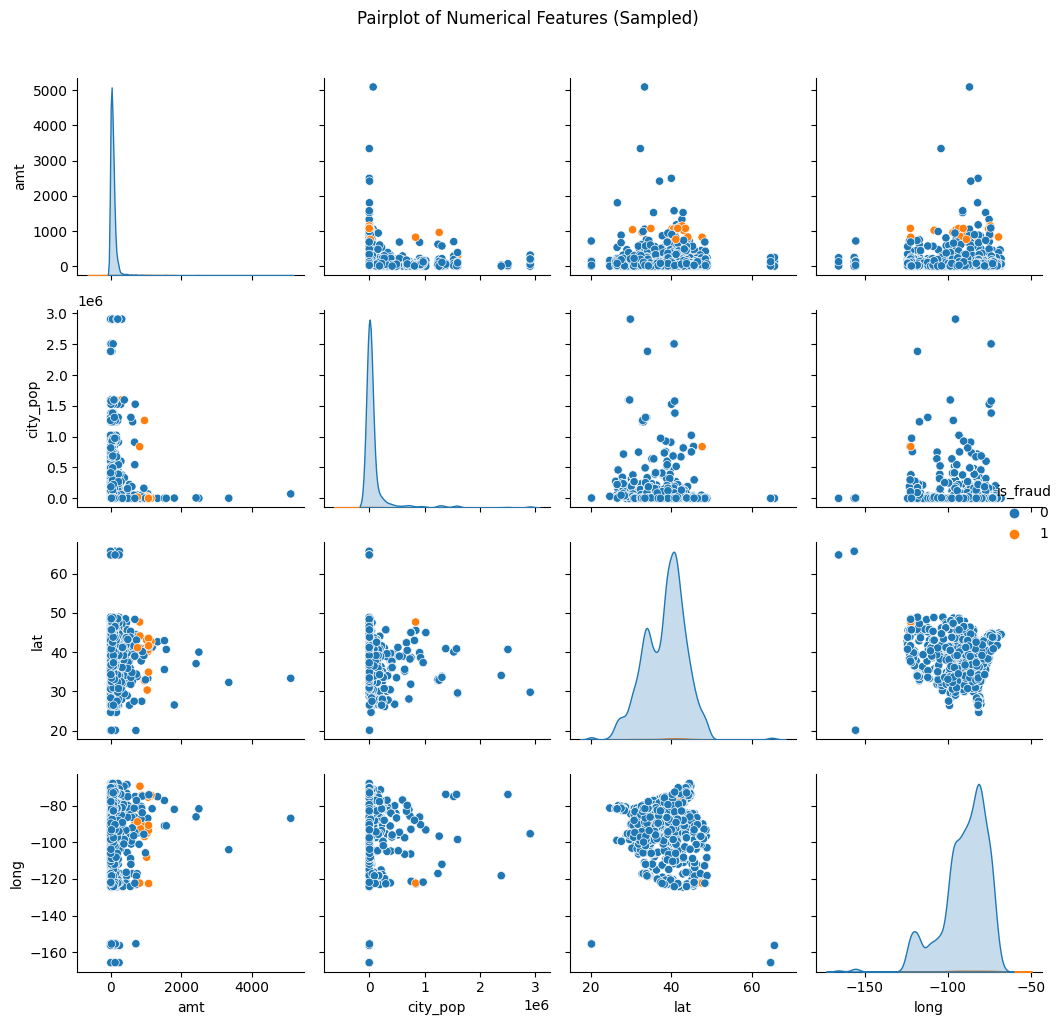

In [20]:
sns.pairplot(df.sample(5000), vars=["amt", "city_pop", "lat", "long"], hue="is_fraud", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features (Sampled)", y=1.02)
plt.tight_layout()
plt.show()

### Correlation with Target (Heatmap including is_fraud)

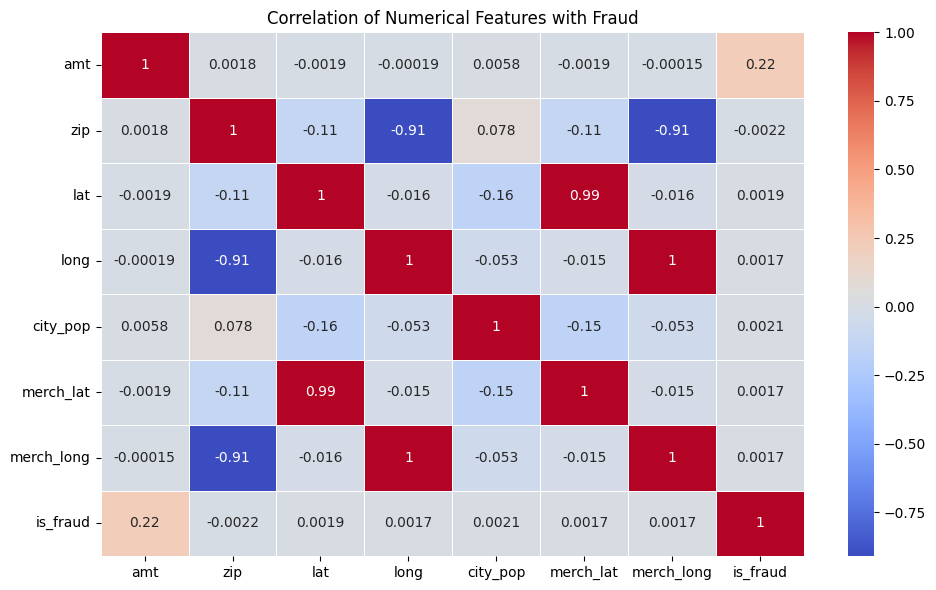

In [21]:
plt.figure(figsize=(10,6))
corr = df[num_cols].corr()   # no need to join is_fraud again
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Numerical Features with Fraud")
plt.tight_layout()
plt.show()


### Fraud Rate by Category & Gender

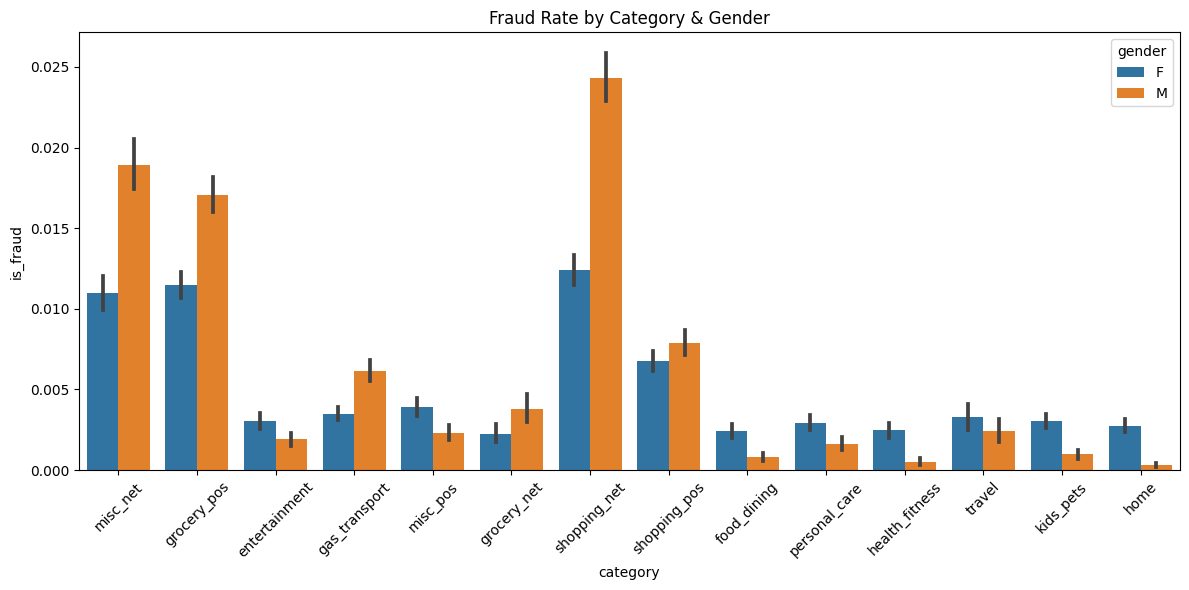

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x="category", y="is_fraud", hue="gender", data=df)
plt.title("Fraud Rate by Category & Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Fraud by Time + Category

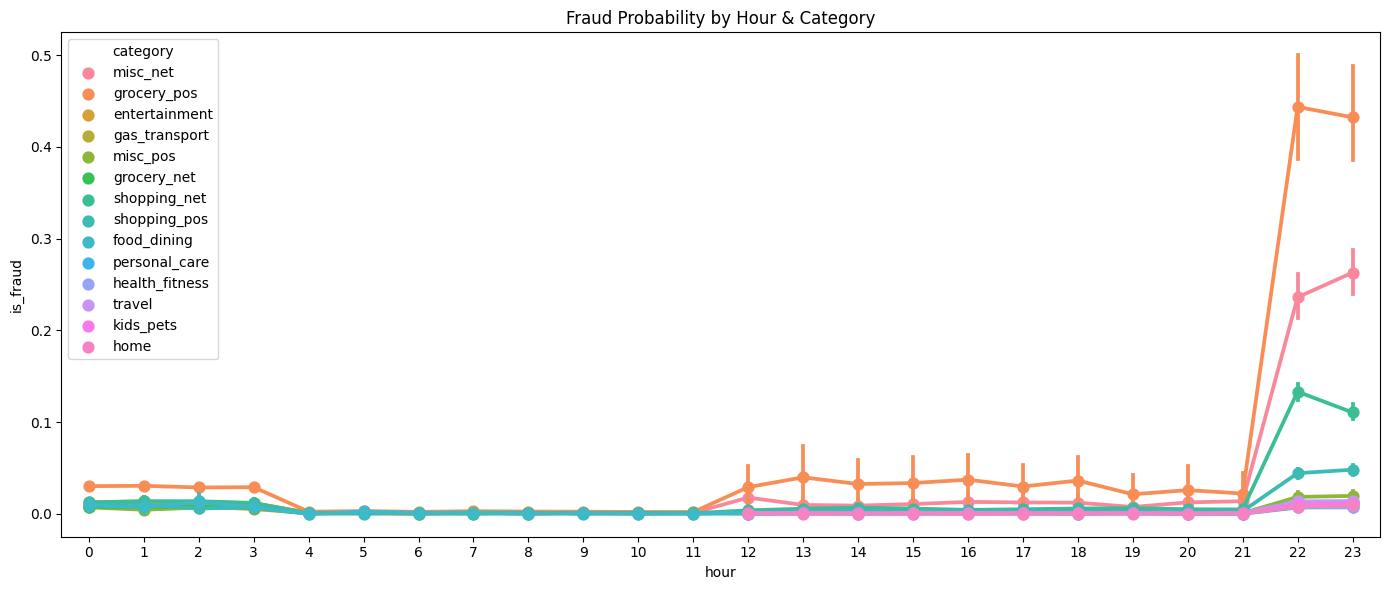

In [23]:
plt.figure(figsize=(14,6))
sns.pointplot(x="hour", y="is_fraud", hue="category", data=df)
plt.title("Fraud Probability by Hour & Category")
plt.tight_layout()
plt.show()

### 3D Scatterplot (Amount vs City Population vs Fraud)

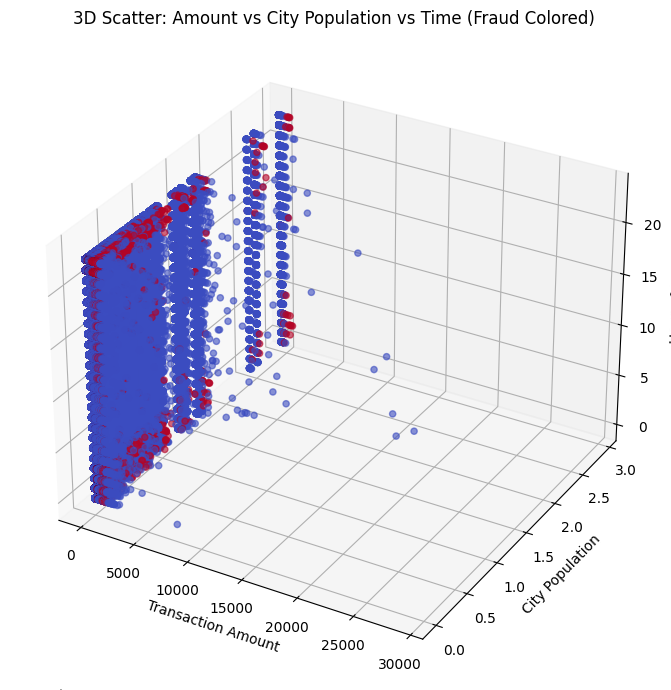

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["amt"], df["city_pop"], df["hour"], c=df["is_fraud"], cmap="coolwarm", alpha=0.6)
ax.set_xlabel("Transaction Amount")
ax.set_ylabel("City Population")
ax.set_zlabel("Hour of Day")
plt.title("3D Scatter: Amount vs City Population vs Time (Fraud Colored)")
plt.tight_layout()
plt.show()

### Parallel Coordinates Plot (Fraud vs Multiple Features)

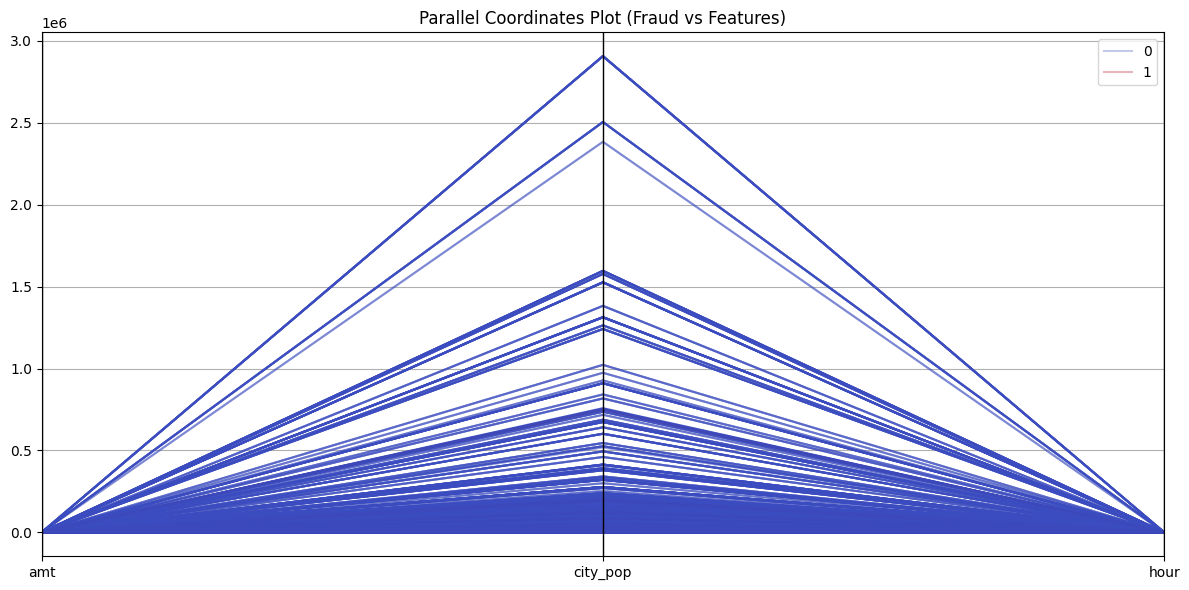

In [25]:
from pandas.plotting import parallel_coordinates

sample_df = df[["amt","city_pop","hour","is_fraud"]].sample(5000)
plt.figure(figsize=(12,6))
parallel_coordinates(sample_df, "is_fraud", colormap="coolwarm", alpha=0.3)
plt.title("Parallel Coordinates Plot (Fraud vs Features)")
plt.tight_layout()
plt.show()

# Dashboard Design

In [26]:
import ipywidgets as widgets
from ipywidgets import interact
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
num_cols = df.select_dtypes(include=["int64","float64"]).columns

category_dropdown = widgets.Dropdown(
    options=["All"] + sorted(df["category"].unique().tolist()),
    value="All",
    description="Category:"
)
gender_dropdown = widgets.Dropdown(
    options=["All", "M", "F"],
    value="All",
    description="Gender:"
)
fraud_toggle = widgets.Dropdown(
    options=["All", "Fraud", "Non-Fraud"],
    value="All",
    description="Fraud:"
)

def filter_data(category, gender, fraud_status):
    data = df.copy()
    if category != "All":
        data = data[data["category"] == category]
    if gender != "All":
        data = data[data["gender"] == gender]
    if fraud_status == "Fraud":
        data = data[data["is_fraud"] == 1]
    elif fraud_status == "Non-Fraud":
        data = data[data["is_fraud"] == 0]
    return data

def dashboard(category, gender, fraud_status):
    data = filter_data(category, gender, fraud_status)
    total_txns = len(data)
    fraud_txns = data["is_fraud"].sum()
    fraud_pct = (fraud_txns / total_txns * 100) if total_txns > 0 else 0
    avg_amt = data["amt"].mean() if total_txns > 0 else 0
    
    print(f"Total Transactions: {total_txns}")
    print(f"Fraud Transactions: {fraud_txns}")
    print(f"Fraud %: {fraud_pct:.2f}%")
    print(f"Avg Amount: ${avg_amt:.2f}")
    print("-"*60)
    
    fig, axes = plt.subplots(2, 2, figsize=(14,10))
    
    sns.histplot(data["amt"], bins=40, kde=True, ax=axes[0,0], color="skyblue")
    axes[0,0].set_title("Distribution of Transaction Amount")
    
    if len(data) > 0:
        fraud_rate = data.groupby("category")["is_fraud"].mean().sort_values(ascending=False)
        fraud_rate.plot(kind="bar", ax=axes[0,1], color="tomato")
        axes[0,1].set_title("Fraud Rate by Category")
    else:
        axes[0,1].text(0.5,0.5,"No Data", ha="center", va="center")
    
    if len(data) > 0:
        data["hour"] = data["trans_date_trans_time"].dt.hour
        sns.countplot(x="hour", hue="is_fraud", data=data, ax=axes[1,0])
        axes[1,0].set_title("Fraud by Hour of Day")
    else:
        axes[1,0].text(0.5,0.5,"No Data", ha="center", va="center")
    
    if len(data) > 0:
        sns.heatmap(data[num_cols].corr(), cmap="coolwarm", ax=axes[1,1])
        axes[1,1].set_title("Correlation Heatmap")
    else:
        axes[1,1].text(0.5,0.5,"No Data", ha="center", va="center")
    
    plt.tight_layout()
    plt.show()

interact(dashboard, 
         category=category_dropdown, 
         gender=gender_dropdown, 
         fraud_status=fraud_toggle)

interactive(children=(Dropdown(description='Category:', options=('All', 'entertainment', 'food_dining', 'gas_t…

<function __main__.dashboard(category, gender, fraud_status)>

# Data Cleaning

## Copy Dataset and handle Duplicates

In [27]:
import numpy as np
df_clean = df.copy()
df_clean = df_clean.drop_duplicates()
df_clean.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,Tuesday,1,2019
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,Tuesday,1,2019
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,0,Tuesday,1,2019
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,0,Tuesday,1,2019
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,0,Tuesday,1,2019


## Drop columns with too many missing values (e.g. > 40%)

In [28]:
thresh = len(df_clean) * 0.4
df_clean = df_clean.dropna(thresh=thresh, axis=1)

# Fill numeric NaNs with median
num_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Fill categorical NaNs with mode
cat_cols = df_clean.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [29]:
df_clean.head(10)

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,Tuesday,1,2019
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,Tuesday,1,2019
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,0,Tuesday,1,2019
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,0,Tuesday,1,2019
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,0,Tuesday,1,2019
5,2019-01-01 00:04:08,gas_transport,94.63,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,40.653382,-76.152667,0,0,Tuesday,1,2019
6,2019-01-01 00:04:42,grocery_net,44.54,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,37.162705,-100.153370,0,0,Tuesday,1,2019
7,2019-01-01 00:05:08,gas_transport,71.65,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,38.948089,-78.540296,0,0,Tuesday,1,2019
8,2019-01-01 00:05:18,misc_pos,4.27,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,40.351813,-79.958146,0,0,Tuesday,1,2019
9,2019-01-01 00:06:01,grocery_pos,198.39,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,37.179198,-87.485381,0,0,Tuesday,1,2019


## Remove Outliers

In [30]:
if "amt" in df_clean.columns:
    q1 = df_clean["amt"].quantile(0.25)
    q3 = df_clean["amt"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_clean = df_clean[(df_clean["amt"] >= lower) & (df_clean["amt"] <= upper)]

In [31]:
df_clean.head(5)

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,Tuesday,1,2019
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,Tuesday,1,2019
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,0,Tuesday,1,2019
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,0,Tuesday,1,2019
5,2019-01-01 00:04:08,gas_transport,94.63,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,40.653382,-76.152667,0,0,Tuesday,1,2019


## Encode categorical variables if needed

### Value counts of the categorical Variables

In [32]:
df_clean.nunique()

trans_date_trans_time    1209705
category                      14
amt                        19238
gender                         2
street                       971
city                         885
state                         51
zip                          958
lat                          956
long                         957
city_pop                     870
job                          491
dob                          956
merch_lat                1185280
merch_long               1210555
is_fraud                       2
hour                          24
dayofweek                      7
month                         12
year                           2
dtype: int64

### We will Encode State, Gender, category, dayofweek

In [33]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Encode gender manually (binary)
df_encoded["gender"] = df_encoded["gender"].map({"M": 0, "F": 1})

# Encode state with LabelEncoder
le_state = LabelEncoder()
df_encoded["state"] = le_state.fit_transform(df_encoded["state"])

# Encode category with LabelEncoder
le_cat = LabelEncoder()
df_encoded["category"] = le_cat.fit_transform(df_encoded["category"])

# One-hot encode dayofweek
df_encoded = pd.get_dummies(df_encoded, columns=["dayofweek"], prefix="day")

# Check encodings
print("Gender:\n", df_encoded["gender"].value_counts())
print("\nState (encoded):\n", df_encoded["state"].value_counts().head())
print("\nCategory (encoded):\n", df_encoded["category"].value_counts().head())
print("\nDay of week one-hot:\n", df_encoded.filter(like="dayofweek_").head())

Gender:
 gender
1    709863
0    586812
Name: count, dtype: int64

State (encoded):
 state
43    94876
34    83501
38    79847
4     56360
35    46480
Name: count, dtype: int64

Category (encoded):
 category
2     131659
4     123638
6     123115
12    116672
7     113035
Name: count, dtype: int64

Day of week one-hot:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [34]:
df_encoded.head(10)

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,month,year,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2019-01-01 00:00:18,8,4.97,1,561 Perry Cove,Moravian Falls,27,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,1,2019,False,False,False,False,False,True,False
1,2019-01-01 00:00:44,4,107.23,1,43039 Riley Greens Suite 393,Orient,47,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,1,2019,False,False,False,False,False,True,False
2,2019-01-01 00:00:51,0,220.11,0,594 White Dale Suite 530,Malad City,13,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,0,1,2019,False,False,False,False,False,True,False
3,2019-01-01 00:01:16,2,45.00,0,9443 Cynthia Court Apt. 038,Boulder,26,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,0,1,2019,False,False,False,False,False,True,False
4,2019-01-01 00:03:06,9,41.96,0,408 Bradley Rest,Doe Hill,45,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,0,1,2019,False,False,False,False,False,True,False
5,2019-01-01 00:04:08,2,94.63,1,4655 David Island,Dublin,38,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,40.653382,-76.152667,0,0,1,2019,False,False,False,False,False,True,False
6,2019-01-01 00:04:42,3,44.54,1,889 Sarah Station Suite 624,Holcomb,16,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,37.162705,-100.153370,0,0,1,2019,False,False,False,False,False,True,False
7,2019-01-01 00:05:08,2,71.65,0,231 Flores Pass Suite 720,Edinburg,45,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,38.948089,-78.540296,0,0,1,2019,False,False,False,False,False,True,False
8,2019-01-01 00:05:18,9,4.27,1,6888 Hicks Stream Suite 954,Manor,38,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,40.351813,-79.958146,0,0,1,2019,False,False,False,False,False,True,False
9,2019-01-01 00:06:01,4,198.39,1,21326 Taylor Squares Suite 708,Clarksville,42,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,37.179198,-87.485381,0,0,1,2019,False,False,False,False,False,True,False


### Class-Imbalance Handling

In [35]:
# Separate majority and minority classes
non_fraud = df[df['is_fraud'] == 0]
fraud = df[df['is_fraud'] == 1]

# Randomly sample from majority class equal to number of minority class
non_fraud_downsampled = non_fraud.sample(len(fraud), random_state=42)

# Combine both classes
df_under = pd.concat([fraud, non_fraud_downsampled])

# Shuffle dataset (optional but good practice)
df_under = df_under.sample(frac=1, random_state=42).reset_index(drop=True)

print("Before undersampling:")
print(df['is_fraud'].value_counts())

print("\nAfter undersampling:")
print(df_under['is_fraud'].value_counts())

Before undersampling:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

After undersampling:
is_fraud
1    7506
0    7506
Name: count, dtype: int64


df_under is the new dataset in focus now.

In [36]:
df_under.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year
0,2020-06-01 01:01:21,grocery_pos,312.81,M,6993 Carr Lodge Apt. 311,Jordan Valley,OR,97910,42.8801,-117.2810,641,Economist,1993-11-24,42.663612,-117.720784,1,1,Monday,6,2020
1,2019-09-12 12:49:41,misc_net,909.75,M,8925 Nicholas Points,Egan,LA,70531,30.2510,-92.5002,1261,Broadcast presenter,1972-07-01,30.624785,-91.516167,1,12,Thursday,9,2019
2,2019-10-05 17:08:54,food_dining,7.59,M,15315 Vaughn Park Suite 356,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,2001-07-05,48.077562,-89.625358,0,17,Saturday,10,2019
3,2019-09-05 13:34:08,food_dining,3.41,M,836 Stephanie Union,Cedar,MI,49621,44.8605,-85.8138,3096,"Social research officer, government",1975-10-11,45.478485,-86.138856,0,13,Thursday,9,2019
4,2019-01-22 23:04:30,personal_care,17.52,F,2924 Bobby Trafficway,Sebring,FL,33872,27.4703,-81.4872,50835,Environmental consultant,1986-01-30,27.686765,-81.094488,1,23,Tuesday,1,2019


### Feature Engineering

In [37]:
# We may calculate the age of the customer conducting the payment
# Convert to datetime
# Assuming the year is the first part of the 'dob' string
df_under['age'] = df_under['year'] - pd.to_datetime(df_under['dob'].str.split(' ').str[0]).dt.year
df_under.head()
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    distance = R * c
    return distance

df_under['distance'] = haversine_distance(df_under['lat'], df_under['long'], df_under['merch_lat'], df_under['merch_long'])
df_final = df_under.drop(['lat', 'trans_date_trans_time', 'long', 'merch_lat', 'street', 'city', 'zip', 'merch_long', 'year', 'job', 'dob'], axis = 1)
df_final.head()

,category,amt,gender,state,city_pop,is_fraud,hour,dayofweek,month,age,distance
0,grocery_pos,312.81,M,OR,641,1,1,Monday,6,27,43.221111
1,misc_net,909.75,M,LA,1261,1,12,Thursday,9,47,103.088498
2,food_dining,7.59,M,MN,272,0,17,Saturday,10,18,41.484336
3,food_dining,3.41,M,MI,3096,0,13,Thursday,9,44,73.289307
4,personal_care,17.52,F,FL,50835,1,23,Tuesday,1,33,45.579616
